In [318]:
import numpy as np
import matplotlib.pyplot as plt

# Function s(a, b) to evaluate the similarity score of two sequences
def func_s(seq_matrix, seq1, seq2, i, j, match, mismatch_penalty):
    if (seq2[i-1] == seq1[j-1]): # If two charcters to be compared are the same
        return seq_matrix[i-1][j-1] + match
    else: # If two charcters to be compared are different
        return seq_matrix[i-1][j-1] - mismatch_penalty

# Function max(H_{i-k, j} - W_k). Here W_k set to be linear, i.e. W_k = k*W_1
def func_gap_i(seq_matrix, seq1, seq2, i, j, gap_penalty):
    max_val = seq_matrix[i-1][j] - 1*gap_penalty
    for k in range(1, i):
        val = seq_matrix[i-k][j] - k*gap_penalty
        if (val > max_val):
            max_val = val
    return max_val
       
# Function max(H_{i, j-k} - W_k). Here W_k set to be linear, i.e. W_k = k*W_1
def func_gap_j(seq_matrix, seq1, seq2, i, j, gap_penalty):
    max_val = seq_matrix[i][j-1] - 1*gap_penalty
    for k in range(1, j):
        val = seq_matrix[i][j-k] - k*gap_penalty
        if (val > max_val):
            max_val = val
    return max_val

# Generate the sequence matrix
def gene_seq_matrix(seq1, seq2, match, gap_penalty, mismatch_penalty):
    seq_matrix = np.zeros((len(seq2)+1, len(seq1)+1))
    direction_matrix = np.zeros((len(seq2)+1, len(seq1)+1), dtype='str')
    direction_matrix.fill('e')
    for i, char1 in enumerate(seq2):
        for j, char2 in enumerate(seq1):
            potential_num = [func_s(seq_matrix, seq1, seq2, i+1, j+1, match, mismatch_penalty), 
                             func_gap_i(seq_matrix, seq1, seq2, i+1, j+1, gap_penalty),
                             func_gap_j(seq_matrix, seq1, seq2, i+1, j+1, gap_penalty), 
                             0]
            seq_matrix[i+1][j+1] = max(potential_num)
            indx = np.argmax(potential_num)
            num2dir = {0:'d', 1:'u', 2:'l', 3: 'e'}
            direction_matrix[i+1][j+1] = num2dir[indx]
    return seq_matrix, direction_matrix

def find_maximum_indices(seq_matrix):
    max_val = seq_matrix.max()
    max_indices = []
    for i in range(seq_matrix.shape[0]):
        for j in range(seq_matrix.shape[1]):
            if (seq_matrix[i][j] == max_val):
                max_indices.append([i, j])
    return max_indices
    
# I only choose one case if multiple correct answers are encountered
def trace_back(seq_matrix, direction_matrix, i, j, seq1, seq2, subseq1='', subseq2=''):
    score = seq_matrix.max()
    if seq_matrix[i][j] == 0:
        return subseq1, subseq2, score
    else: 
        if direction_matrix[i][j] == 'd':
            return trace_back(seq_matrix, direction_matrix, i-1, j-1, seq1, seq2, seq1[j-1]+subseq1, seq2[i-1]+subseq2)
        elif direction_matrix[i][j] == 'l':
            return trace_back(seq_matrix, direction_matrix, i, j-1, seq1, seq2, seq1[j-1]+subseq1, '-'+subseq2)
        elif direction_matrix[i][j] == 'u':
            return trace_back(seq_matrix, direction_matrix, i-1, j, seq1, seq2, '-'+subseq1, seq2[i-1]+subseq2)
        else:
            return trace_back(seq_matrix, direction_matrix, i-1, j-1, seq1, seq2, seq1[j-1]+subseq1, seq2[i-1]+subseq2)
        
def plot_matrix(matrix, seq1, seq2):
    plt.xticks(range(len(seq1)), labels=seq1)
    plt.yticks(range(len(seq2)), labels=seq2)
    plt.imshow(matrix[1:, 1:], cmap='binary')
    plt.gca().xaxis.tick_top()
    

def align(seq1, seq2, match=1, gap_penalty=1, mismatch_penalty=1):
    seq_matrix, direction_matrix = gene_seq_matrix(seq1, seq2, match, gap_penalty, mismatch_penalty)
    plot_matrix(seq_matrix, seq1, seq2)
    subseq1, subseq2, score = trace_back(seq_matrix, direction_matrix, find_maximum_indices(seq_matrix)[0][0], find_maximum_indices(seq_matrix)[0][1], seq1, seq2)
    # subseq1, subseq2, score = trace_back(seq_matrix, find_maximum_indices(seq_matrix)[0][0], find_maximum_indices(seq_matrix)[0][1], seq1, seq2, match, gap_penalty)
    if (subseq1[0] == '-' or subseq2[0] == '-'):
        subseq1 = subseq1[1:]
        subseq2 = subseq2[1:]
    return subseq1, subseq2, score


('agacccta-cgt-gac', 'aga-cctagcatcgac', 8.0)

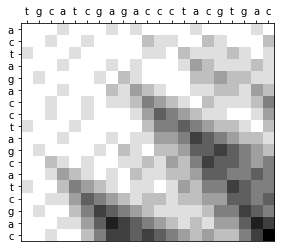

In [321]:
align('tgcatcgagaccctacgtgac', 'actagacctagcatcgac')

('gcatcga', 'gcatcga', 7.0)

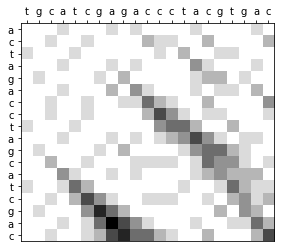

In [328]:
align('tgcatcgagaccctacgtgac', 'actagacctagcatcgac', gap_penalty=2)

('gtt-ac', 'gttgac', 13.0)

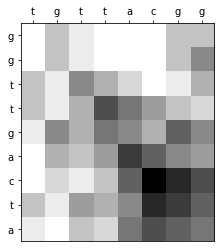

In [319]:
align('tgttacgg', 'ggttgacta', match=3, mismatch_penalty=3, gap_penalty=2)

('gtt', 'gtt', 9.0)

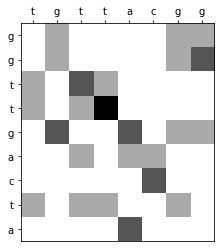

In [322]:
align('tgttacgg', 'ggttgacta', match=3, mismatch_penalty=3, gap_penalty=100)

('cgagaccctacgt', 'ctagacctagcat', 75.0)

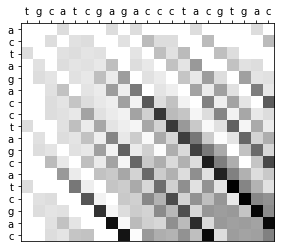

In [326]:
align('tgcatcgagaccctacgtgac', 'actagacctagcatcgac', match=10, gap_penalty=100)